<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [5]:
print("60%")

60%

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, because since he has now captured a troll, this means that E2 is now out of question. This means that there is now, according to Baye's theorem, 33% of crossing safely.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

If he captures a troll, then he knows he is in E1 or E2.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [72]:
PE1 = .4
PT_E1 = .2
PE2 = .2
PE3 = .6
Unsafe = (PT_E1 * PE1)/((PE2 * PE2) + (PE1 * PE2) + (0 * PE3))

0.6666666666666666

Probability of the other event given a troll captured: 

In [74]:
PE1 = .4
PT_E2 = .2
PE2 = .2
PE3 = .6
Safe = (PT_E2 * PE2)/((PE2 * PE2) + (PE1 * PE2) + (0 * PE3))

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [12]:
print("33.3%")

33.3%

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [13]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [27]:
import Distributions as di
import Plots
import Polynomials
import Random
using Distributions
using Plots
using Polynomials
using Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [16]:
x= -10:10
collect(x)

21-element Vector{Int64}:
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10

In [19]:
y_true = x .^ 2 + 3x .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [22]:
x
dataerr = 10
noise = di.Normal(0,dataerr)
y_observed = y_true + rand(noise, length(x))

21-element Vector{Float64}:
  64.93646167077574
  51.19963850445408
  39.21878124588651
   1.9291303239475255
   7.306198073846405
  -3.363358362621236
 -10.602513913506906
   2.1676958876802095
  -3.360294974374958
   6.438760651941852
   0.3043941531342198
  -5.234692476079251
   9.338993999931462
  14.782367862438006
  30.151788607368683
  33.4185123548126
  48.807419426776626
  70.54544161926233
  96.94820442224565
  96.95123235801947
 129.73524324834327

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

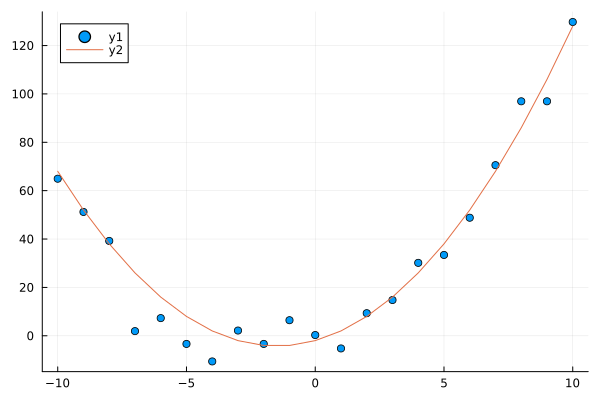

In [25]:
using Plots
scatter(x, y_observed)
plot!(x, y_true)

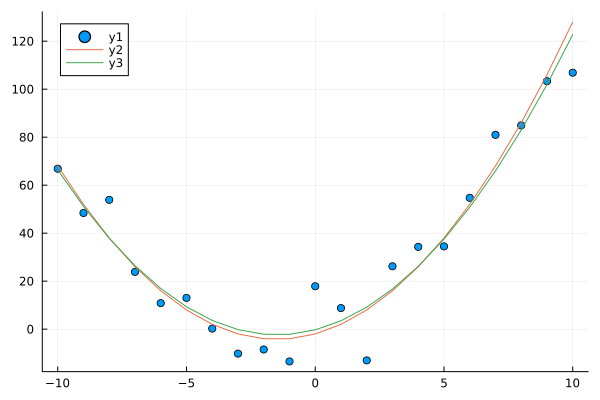

In [49]:
using Polynomials: Polynomials, fit, coeffs
Polynomial([-2,3,1])
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ (fit_coeff[2] .* (x)) .+ ((fit_coeff[3]) .* (x.^2))
scatter(x,y_observed)
plot!(x,y_true)
plot!(x,y_fitted)


### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

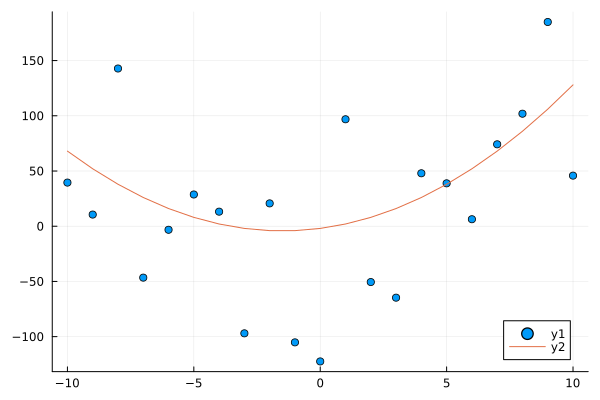

In [45]:
x_2 = -10:10
collect(x_2)
dataerr = 50
noise = di.Normal(0,dataerr)
y_observed2 = y_true + rand(noise, length(x_2))
scatter(x_2,y_observed2)
plot!(x_2,y_true)

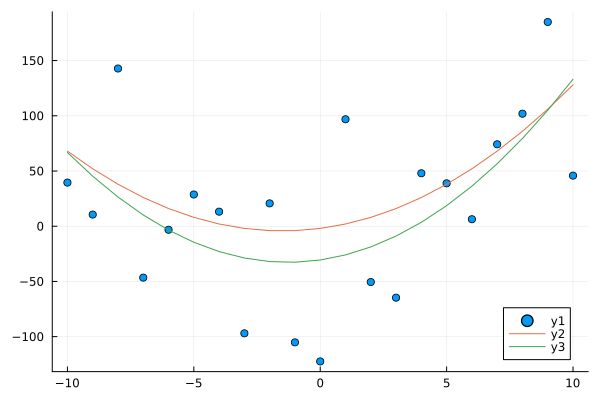

In [47]:
using Polynomials: Polynomials, fit, coeffs
Polynomial([-2,3,1])
line_fit2 = fit(x_2,y_observed2,2)
fit_coeff2 = coeffs(line_fit2)
y_fitted2 = fit_coeff2[1] .+ (fit_coeff2[2] .* (x_2)) .+ ((fit_coeff2[3]) .* (x.^2))
scatter(x_2,y_observed2)
plot!(x_2,y_true)
plot!(x_2,y_fitted2)

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fit is not as close as in 2.3 . This has to do with the increase in standard devation, increasing the devation of the data from the mean.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


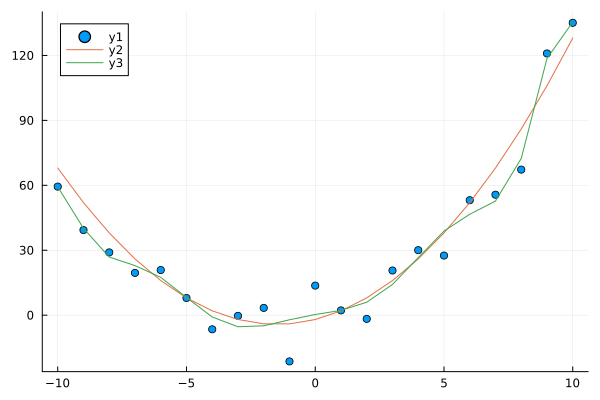

In [68]:
scatter(x,y_observed)
plot!(x,y_true)
plot!(x,fit(x,y_observed,10).(x))

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


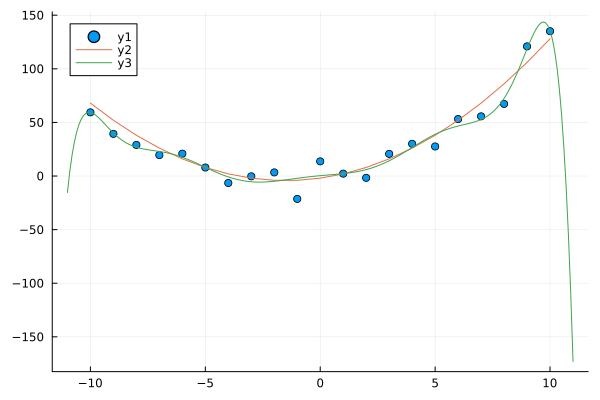

In [69]:
x_fit = -11:0.1:11
collect(x_fit)
scatter(x,y_observed)
plot!(x,y_true)
plot!(x_fit,fit(x,y_observed,10).(x_fit))

3. What do you observe in the plot? What is this phenomenon called?

The curve of best fit is going in between data points in order to skew a fit line through as many data points as possible. This is called overfitting.